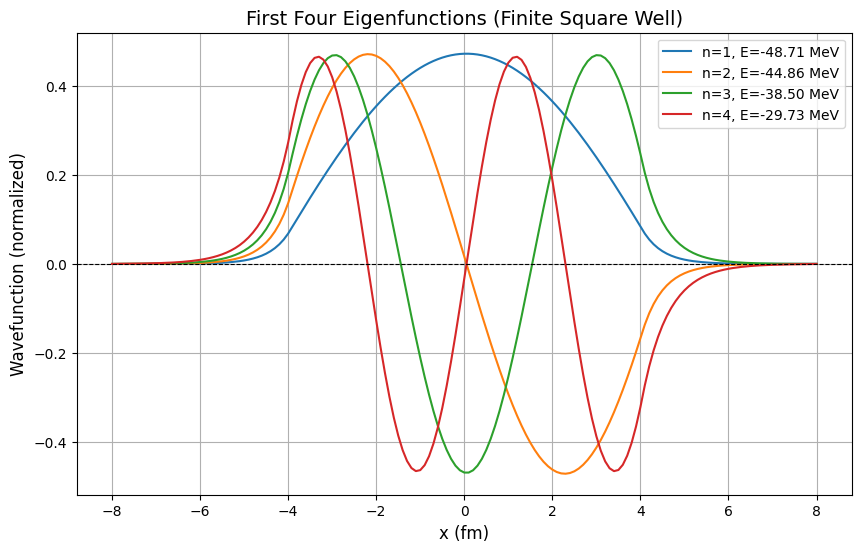

Eigenvalues (MeV):
n=1: E=-48.71 MeV
n=2: E=-44.86 MeV
n=3: E=-38.50 MeV
n=4: E=-29.73 MeV


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
hbar2_over_2m = 20.75  # MeV·fm²
a = 4.0  # fm (well width extends from -a to +a)
h = 0.1  # fm (mesh size)
V0 = 50.0  # MeV (depth of the square well)
tolerance = 1e-6  # Energy convergence criterion

# Define the finite square well potential
def V(x):
    if abs(x) <= a:
        return -V0
    else:
        return 0.0

# Numerov function
def numerov(E, x_grid):
    """Numerov method for propagating the wavefunction."""
    N = len(x_grid)
    psi = np.zeros(N)  # Wavefunction array
    k = 2 * (E - np.array([V(x) for x in x_grid])) / hbar2_over_2m  # k(x) = 2(E - V)/hbar²

    # Initial conditions (ψ(0) = 0, small arbitrary ψ(h))
    psi[0] = 0.0
    psi[1] = 1e-5  # Small arbitrary value

    # Numerov method
    for i in range(1, N - 1):
        psi[i + 1] = (
            (2 * (1 - (5 / 12) * h**2 * k[i]) * psi[i]
             - (1 + (1 / 12) * h**2 * k[i - 1]) * psi[i - 1])
            / (1 + (1 / 12) * h**2 * k[i + 1])
        )

    return psi

# Shooting method to find eigenvalues
def shooting_method(n_nodes, x_grid):
    """Find the eigenvalue for a given number of nodes using the shooting method."""
    E_low, E_high = -V0, 100.0  # Energy range to search
    psi = None

    while E_high - E_low > tolerance:
        E_mid = (E_low + E_high) / 2
        psi = numerov(E_mid, x_grid)

        # Count the number of nodes
        nodes = np.sum(psi[:-1] * psi[1:] < 0)

        # Adjust the energy bounds
        if nodes > n_nodes:
            E_high = E_mid
        else:
            E_low = E_mid

    return E_mid, psi

# Set up the spatial grid
x_grid = np.arange(-2 * a, 2 * a + h, h)

# eigenvalues and eigenfunctions
eigenvalues = []
wavefunctions = []
for n_nodes in range(4):
    E, psi = shooting_method(n_nodes, x_grid)
    eigenvalues.append(E)
    # Normalize the wavefunction using the grid spacing
    norm = np.sqrt(np.sum(psi**2) * h)
    wavefunctions.append(psi / norm)

# Plot the eigenfunctions
plt.figure(figsize=(10, 6))
for i, psi in enumerate(wavefunctions):
    plt.plot(x_grid, psi, label=f'n={i+1}, E={eigenvalues[i]:.2f} MeV')

plt.title('First Four Eigenfunctions (Finite Square Well)', fontsize=14)
plt.xlabel('x (fm)', fontsize=12)
plt.ylabel('Wavefunction (normalized)', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()

# Print the eigenvalues
print("Eigenvalues (MeV):")
for n, eigenvalue in enumerate(eigenvalues, start=1):
    print(f"n={n}: E={eigenvalue:.2f} MeV")
